In [26]:
import numpy as np
import keras
import pickle
import sklearn
from sklearn.utils import shuffle
import pandas as pd
from random import shuffle


In [27]:
with open('x_train_saved.pickle', 'rb') as f:
    x_train = np.array(pickle.load(f))
    
    
with open('y_train_saved.pickle', 'rb') as f:
    y_train = np.array((pickle.load(f)))

In [28]:
x_train = x_train[0,:,:]
y_train = y_train[0,:,:]
print(" x_train shape: ", x_train.shape, "\n", "y_train shape: ", y_train.shape)

 x_train shape:  (8479, 208) 
 y_train shape:  (8479, 3)


In [29]:
x_train = np.vstack(x_train)
x_train = x_train.reshape(x_train.shape[0], 13, 16,1)
y_train = np.vstack(y_train)
#x_train, y_train = shuffle(x_train, y_train, random_state=1)
input_shape = (13, 16, 1)

In [30]:
x_train.shape

(8479, 13, 16, 1)

In [31]:
hopp = 0
hoyre = 0
HH = 0

antall_hoyre = []

for i in range(len(y_train)):
    if y_train[i][0] == 1:
        hopp = hopp + 1
    elif y_train[i][1] == 1:
        hoyre = hoyre + 1
        antall_hoyre.append(i)
    elif y_train[i][2] == 1:
        HH = HH + 1
print("antall hopp:", hopp, "antall høyre:", hoyre, "antall HH", HH)    
    

shuffle(antall_hoyre)        
#print(antall_hoyre)
delete_frames = antall_hoyre[:HH]

    

antall hopp: 5 antall høyre: 3987 antall HH 4487


In [32]:
import matplotlib.pyplot as plt
print(hopp, hoyre, HH)

5 3987 4487


In [33]:
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(input_shape)),
    #Conv2D(20, kernel_size=(3, 3), strides=(1, 1), activation='linear', input_shape=(input_shape)),
    Dense(20, activation='relu'),

    #Conv2D(4, kernel_size=(3, 3), strides=(3, 3), activation='linear'),

    Dense(12, activation='relu'),

    Flatten(),
    Dense(3, activation='softmax')
])


model.compile(Adam(lr = 0.015),loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 13, 16, 10)        20        
_________________________________________________________________
dense_17 (Dense)             (None, 13, 16, 20)        220       
_________________________________________________________________
dense_18 (Dense)             (None, 13, 16, 12)        252       
_________________________________________________________________
flatten_5 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 7491      
Total params: 7,983
Trainable params: 7,983
Non-trainable params: 0
_________________________________________________________________


Train on 6783 samples, validate on 1696 samples
Epoch 1/40
 - 2s - loss: 0.5219 - acc: 0.7479 - val_loss: 0.5499 - val_acc: 0.7524
Epoch 2/40
 - 1s - loss: 0.4448 - acc: 0.8041 - val_loss: 0.6037 - val_acc: 0.7565
Epoch 3/40
 - 1s - loss: 0.4383 - acc: 0.8088 - val_loss: 0.5875 - val_acc: 0.7612
Epoch 4/40
 - 1s - loss: 0.4337 - acc: 0.8142 - val_loss: 0.5477 - val_acc: 0.7671
Epoch 5/40
 - 1s - loss: 0.4314 - acc: 0.8153 - val_loss: 0.5296 - val_acc: 0.7577
Epoch 6/40
 - 1s - loss: 0.4245 - acc: 0.8162 - val_loss: 0.5243 - val_acc: 0.7700
Epoch 7/40
 - 1s - loss: 0.4172 - acc: 0.8254 - val_loss: 0.5444 - val_acc: 0.7748
Epoch 8/40
 - 1s - loss: 0.4116 - acc: 0.8254 - val_loss: 0.5405 - val_acc: 0.7783
Epoch 9/40
 - 1s - loss: 0.4010 - acc: 0.8310 - val_loss: 0.5714 - val_acc: 0.7742
Epoch 10/40
 - 1s - loss: 0.4012 - acc: 0.8309 - val_loss: 0.5225 - val_acc: 0.7754
Epoch 11/40
 - 1s - loss: 0.3945 - acc: 0.8371 - val_loss: 0.5152 - val_acc: 0.7724
Epoch 12/40
 - 1s - loss: 0.4045 - ac

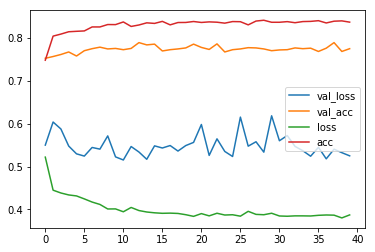

final validation acc:  0.7747641495903427 
final validation loss:  0.524898439768772 
final acc:  0.8366504465428212 
final loss:  0.38715043861694115


In [35]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 50, epochs = 40, verbose = 2)
all_data = list(history.history.values())

val_loss, val_acc, loss, acc = all_data[0], all_data[1], all_data[2], all_data[3]

plt.plot(val_loss, label = "val_loss")
plt.plot(val_acc, label = "val_acc")
plt.plot(loss, label = "loss")
plt.plot(acc, label = "acc")
plt.legend(loc='best')

final_element = len(val_acc) - 1
plt.show()
print("final validation acc: ", val_acc[final_element],'\n' "final validation loss: ", val_loss[final_element],'\n' "final acc: ", acc[final_element],'\n' "final loss: ", loss[final_element])

In [36]:
from keras.models import load_model
model.save('mariplayer.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one


array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]